<a href="https://colab.research.google.com/github/duyqu-chan/CRM-Analytics/blob/master/Gratis_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRM Analytics: Gratis Case Study

  Gratis sell products in various categories. The representative data that  contains the shopping details made from *Hair* category. The aim of this project is to analyze the derived representative data and prepare new campaign proposals and campaign ideas to the marketing department of A brand.

  Expectation of brand A:
+ To get insight about their own business processes.
+ To gain new customers, to retain the existing customers and churn the possibility of losing customers to see the strategies through the phenomenon.


## Dataset Exploration

Mount Google drive to upload the data.

In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Let's start by reading the data and observe values.

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Gratis/RETAIL_TRX_DATA.csv")
df.head()

,CUST_ID,RTL_TRANS_ID,TRX_DATE,ITEM_QUANTITY,ITEM_UNIT_PRICE,ITEM_ID,BRAND_NAME,FIRST_TRANS_DATE,LAST_TRANS_DATE
0,10000,01128000022018120817086098,08DEC2018:17:08:38.000000,1.0,15.70,10140396,DIGER,28OCT2017:15:00:00,10AUG2019:15:00:00
1,1000000,01205000032019062317593178,23JUN2019:17:59:19.000000,1.0,14.95,10167618,DIGER,01OCT2017:15:00:00,08AUG2019:15:00:00
2,1000001,01042000032018101716332124,17OCT2018:16:33:12.000000,1.0,17.90,10063960,DIGER,21OCT2017:15:00:00,20JUL2019:15:00:00
3,1000004,01133000012018042115556158,21APR2018:15:55:39.000000,3.0,6.90,10013901,DIGER,07OCT2017:15:00:00,27AUG2019:15:00:00
4,1000004,01133000022017110614467148,06NOV2017:14:46:44.000000,1.0,24.90,12000154,DIGER,07OCT2017:15:00:00,27AUG2019:15:00:00


We have 1731641 instances with 9 features in the dataset. The description of the columns are:
Data Description:
1. **CUST_ID:** Represents the unique customer number assigned to each customer.
2. **RTL_TRANS_ID:** Represents the transaction number assigned to each transaction.
3. **TRX_DATE:** Provides the date of the transaction.
4. **ITEM_QUANTITY:** It gives the quantity information of the related product purchased.
5. **ITEM_UNIT_PRICE:** Represents the price of the purchased product.
6. **ITEM_ID:** The product id representing the product.
7. **BRAND_NAME:** The brand name of the purchased product. (A brand and Other)
8. **FIRST_TRANS_DATE:** Gives the first shopping date in Gratis.
9. **LAST_TRANS_DATE:** Returns the last shopping date in Gratis.


** TRX_DATE gives the sales date of the related product. FIRST_TRANS_DATE / LAST_TRANS_DATE The first and last exchange in Gratis.

In [3]:
df.shape

(1731641, 9)

There are no duplicates, all rows are unique in the dataset.

In [4]:
df.duplicated().any()

False

When we checked the datatypes we saw that date related columns are encoded in the wrong format and converted them to date-time objects.

In [5]:
df.dtypes

CUST_ID               int64
RTL_TRANS_ID         object
TRX_DATE             object
ITEM_QUANTITY       float64
ITEM_UNIT_PRICE     float64
ITEM_ID               int64
BRAND_NAME           object
FIRST_TRANS_DATE     object
LAST_TRANS_DATE      object
dtype: object

In [6]:
df['TRX_DATE'] = pd.to_datetime(df['TRX_DATE'], format='%d%b%Y:%H:%M:%S.%f')
df['FIRST_TRANS_DATE'] = pd.to_datetime(df['FIRST_TRANS_DATE'], format='%d%b%Y:%H:%M:%S')
df['LAST_TRANS_DATE'] = pd.to_datetime(df['LAST_TRANS_DATE'], format='%d%b%Y:%H:%M:%S')
df.head()               

,CUST_ID,RTL_TRANS_ID,TRX_DATE,ITEM_QUANTITY,ITEM_UNIT_PRICE,ITEM_ID,BRAND_NAME,FIRST_TRANS_DATE,LAST_TRANS_DATE
0,10000,01128000022018120817086098,2018-12-08 17:08:38,1.0,15.70,10140396,DIGER,2017-10-28 15:00:00,2019-08-10 15:00:00
1,1000000,01205000032019062317593178,2019-06-23 17:59:19,1.0,14.95,10167618,DIGER,2017-10-01 15:00:00,2019-08-08 15:00:00
2,1000001,01042000032018101716332124,2018-10-17 16:33:12,1.0,17.90,10063960,DIGER,2017-10-21 15:00:00,2019-07-20 15:00:00
3,1000004,01133000012018042115556158,2018-04-21 15:55:39,3.0,6.90,10013901,DIGER,2017-10-07 15:00:00,2019-08-27 15:00:00
4,1000004,01133000022017110614467148,2017-11-06 14:46:44,1.0,24.90,12000154,DIGER,2017-10-07 15:00:00,2019-08-27 15:00:00


Let's get the dataframe info as follows:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731641 entries, 0 to 1731640
Data columns (total 9 columns):
CUST_ID             int64
RTL_TRANS_ID        object
TRX_DATE            datetime64[ns]
ITEM_QUANTITY       float64
ITEM_UNIT_PRICE     float64
ITEM_ID             int64
BRAND_NAME          object
FIRST_TRANS_DATE    datetime64[ns]
LAST_TRANS_DATE     datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(2), object(2)
memory usage: 118.9+ MB


Miracolusly there are no missing variables in any of the columns.

In [8]:
df.isnull().any()

CUST_ID             False
RTL_TRANS_ID        False
TRX_DATE            False
ITEM_QUANTITY       False
ITEM_UNIT_PRICE     False
ITEM_ID             False
BRAND_NAME          False
FIRST_TRANS_DATE    False
LAST_TRANS_DATE     False
dtype: bool

There is no non-negative price, as expected.

In [9]:
len(df[df.ITEM_UNIT_PRICE < 0])

0

There is no non-negative or zero item quantity, as expected.

In [10]:
len(df[df.ITEM_QUANTITY <= 0])

0

## Insights and Visualization

An average customer buys one item in one transaction. Mean unit price is 1.38 TRY (std = 7.84 TRY).

In [11]:
df.describe()

,CUST_ID,ITEM_QUANTITY,ITEM_UNIT_PRICE,ITEM_ID
count,1.731641e+06,1.731641e+06,1.731641e+06,1.731641e+06
mean,3.003829e+06,1.008438e+00,1.384603e+01,1.039865e+07
std,3.058808e+06,1.898518e-01,7.837371e+00,8.033981e+05
min,2.001000e+03,1.000000e+00,0.000000e+00,1.000005e+07
25%,8.481120e+05,1.000000e+00,8.900000e+00,1.001922e+07
50%,2.096239e+06,1.000000e+00,1.195000e+01,1.003571e+07
75%,4.408432e+06,1.000000e+00,1.690000e+01,1.011497e+07
max,1.805552e+07,6.000000e+01,8.995000e+01,1.700055e+07


Brand A has 36365 items with a mean unit price of 17.83 TRY (std = 4.61 TRY).

In [12]:
df_A = df[df.BRAND_NAME == "A"]
df_A.describe()

,CUST_ID,ITEM_QUANTITY,ITEM_UNIT_PRICE,ITEM_ID
count,3.636500e+04,36365.000000,36365.000000,3.636500e+04
mean,2.942126e+06,1.020074,17.834808,1.159250e+07
std,3.075487e+06,0.210895,4.605865,8.020331e+05
min,2.062000e+03,1.000000,6.900000,1.000481e+07
25%,8.257930e+05,1.000000,13.900000,1.200046e+07
50%,2.060515e+06,1.000000,18.500000,1.200047e+07
75%,4.124422e+06,1.000000,19.950000,1.200048e+07
max,1.803551e+07,9.000000,33.800000,1.200115e+07


In [13]:
df.columns

Index(['CUST_ID', 'RTL_TRANS_ID', 'TRX_DATE', 'ITEM_QUANTITY',
       'ITEM_UNIT_PRICE', 'ITEM_ID', 'BRAND_NAME', 'FIRST_TRANS_DATE',
       'LAST_TRANS_DATE'],
      dtype='object')

### Retail Transaction ID
Brand A mekes the 2.1% of the over all brands. 97.7% of the buyers purchase one or several amounts of the same item during one transaction, remaining 2.3% buys different items in one transaction.

In [14]:
df[df.BRAND_NAME == "A"].shape[0]/len(df)*100

2.1000311265441276

In [15]:
len(df.RTL_TRANS_ID.unique())/len(df)*100

97.70512479203252

### Transaction Date

The transaction dates provided in the dataset lies between September, 2019 and August 2019.

In [16]:
print("Earliest Transaction Date: ", df.TRX_DATE.min())
print("Last Transaction Date: ", df.TRX_DATE.max())
duration = df.TRX_DATE.max()-df.TRX_DATE.min()
print("Duration (days): ",duration.days)

Earliest Transaction Date:  2017-09-06 10:12:05
Last Transaction Date:  2019-08-29 15:00:00.408000
Duration (days):  722


The transaction time span for brand A lies in the same time window.

In [17]:
print("Earliest Transaction Date for Brand A: ", df[df.BRAND_NAME == "A"].TRX_DATE.min())
print("Last Transaction Date for Brand A: ", df[df.BRAND_NAME == "A"].TRX_DATE.max())
duration = df[df.BRAND_NAME == "A"].TRX_DATE.max()-df[df.BRAND_NAME == "A"].TRX_DATE.min()
print("Duration for Brand A(days): ",duration.days)

Earliest Transaction Date for Brand A:  2017-09-07 15:45:20
Last Transaction Date for Brand A:  2019-08-29 14:32:32
Duration for Brand A(days):  720


In [18]:
from datetime import date
f_date = date(2014, 7, 2)
l_date = date(2014, 7, 11)
delta = l_date - f_date
print(delta.days)

9


### Item Quantity

Since brand A makes only 2.1% of the overall brands, quantity of the other brand items highly dominates. When we look at to the puchases with 10 or lesser items, we see that brand A is localized around 1 wheras item quantity of other extend to 2.

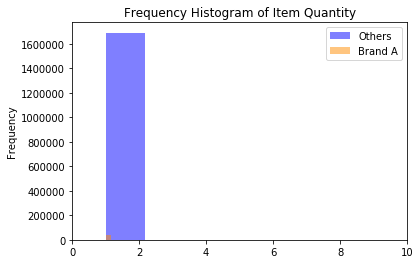

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

x1 = df.loc[df.BRAND_NAME =='DIGER', 'ITEM_QUANTITY']
x2 = df.loc[df.BRAND_NAME=='A', 'ITEM_QUANTITY']


kwargs = dict(alpha=0.5, bins = 50)

plt.hist(x1, **kwargs, color='b', label='Others')
plt.hist(x2, **kwargs, color='darkorange', label='Brand A')

plt.gca().set(title='Frequency Histogram of Item Quantity', ylabel='Frequency')
plt.xlim(0,10)
plt.legend();

### Item Unit Price

Unit price distribution of the items belonging to other brands are positively skewed with a median value of 1.19 TRY. However, average unit price of the items of brand A is 17.83 TRY (std =4.60). It is obvious that brand A's products are more expensive than the rest.

In [20]:
df[df.BRAND_NAME == "DIGER"]["ITEM_UNIT_PRICE"].describe()

count    1.695276e+06
mean     1.376047e+01
std      7.870091e+00
min      0.000000e+00
25%      8.900000e+00
50%      1.190000e+01
75%      1.650000e+01
max      8.995000e+01
Name: ITEM_UNIT_PRICE, dtype: float64

In [21]:
df[df.BRAND_NAME == "A"]["ITEM_UNIT_PRICE"].describe()

count    36365.000000
mean        17.834808
std          4.605865
min          6.900000
25%         13.900000
50%         18.500000
75%         19.950000
max         33.800000
Name: ITEM_UNIT_PRICE, dtype: float64

Text(0.5, 0, 'Unit Price (TRY)')

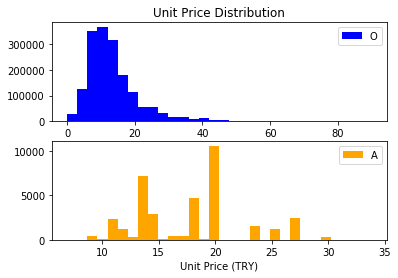

In [22]:
#fig, ax = plt.subplots((2, 1),figsize=(10, 8))
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(df[df.BRAND_NAME == "DIGER"]["ITEM_UNIT_PRICE"],bins=30, color="blue")#, alpha=0.5, ax=ax)
ax2.hist(df[df.BRAND_NAME == "A"]["ITEM_UNIT_PRICE"], bins=30, color="orange")#, alpha=0.5, ax=ax)
ax1.legend("O")
ax2.legend("A")
ax1.set_title('Unit Price Distribution')
ax2.set_xlabel('Unit Price (TRY)')

### Item ID

There are 1851 different items in hair products. Distribution of the top 10 items in hair products sold in Gratis is as follows. Item with 10013125 ID has the highest frequency.

In [23]:
len(df.ITEM_ID.unique())

1851

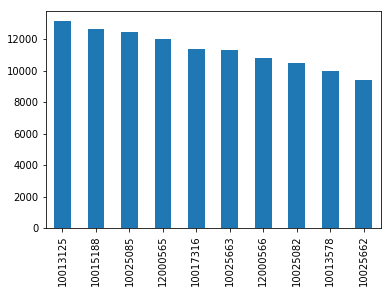

In [24]:
df.ITEM_ID.value_counts()[:10].plot(kind='bar')

Brand A has 36 different hair products sold in Gratis.

In [25]:
len(df[df.BRAND_NAME == "A"].ITEM_ID.unique())

36

Distribution of A's top 10 products are as follows. Unfortunately none of them is listed in the top 10 hair products sold in Gratis.

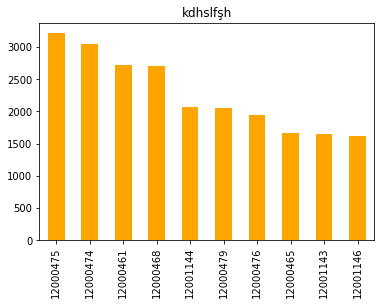

In [26]:
df[df.BRAND_NAME == "A"].ITEM_ID.value_counts()[:10].plot(kind='bar', color ="orange", title = "kdhslfşh")

### Brand Name

Only 2.1% of the brands belongs to brand A.

In [27]:
round(df.BRAND_NAME.value_counts()/len(df)*100,3)

DIGER    97.9
A         2.1
Name: BRAND_NAME, dtype: float64

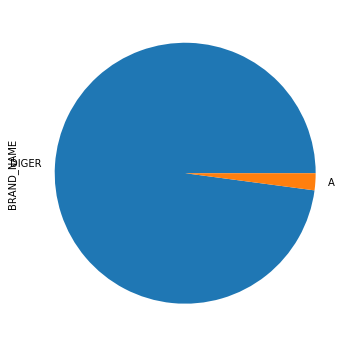

In [28]:
df.BRAND_NAME.value_counts().plot(kind='pie',figsize=(6, 6))


## Feature Generation

### Monthly Revenue

Assuming *Transaction Date* as invoice date, we can calculate the monthly revenue as follows:

---

Revenue = Active Customer Count * Order Count * Average Revenue per Order

---

When we plotted monthly revenue for all hair products sold in Gratis and Brand A, we observed the same seasonality. It is obvious that monthly revenue is growing. There are abrupt jumps in revenues, this might be due to campaigns of Gratis. After sudden increases in those so called campaign era, revenue slighly decreases with a linear trend. More probably there is no seperate campaign made for Brand A so it follows the same trend.


In [57]:
#creating YearMonth field for the ease of reporting and visualization
df['InvoiceYearMonth'] = df['TRX_DATE'].map(lambda date: 100*date.year + date.month)
df['InvoiceYearMonth'] = df['InvoiceYearMonth'].astype(str) #required for true visualization
#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
df['Revenue'] = df['ITEM_UNIT_PRICE'] * df['ITEM_QUANTITY']
tx_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue.head()


,InvoiceYearMonth,Revenue
0,201709,271441.300000
1,201710,629475.640000
2,201711,526596.390000
3,201712,766644.920001
4,201801,520568.950000


Generate the same feature for Brand A:

In [58]:
#creating YearMonth field for the ease of reporting and visualization
df_A['InvoiceYearMonth'] = df_A['TRX_DATE'].map(lambda date: 100*date.year + date.month)
df_A['InvoiceYearMonth'] = df_A['InvoiceYearMonth'].astype(str) #required for true visualization
#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
df_A['Revenue'] = df_A['ITEM_UNIT_PRICE'] * df_A['ITEM_QUANTITY']
tx_revenue_A = df_A.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue_A.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

,InvoiceYearMonth,Revenue
0,201709,7845.33
1,201710,16267.85
2,201711,13109.06
3,201712,20124.40
4,201801,12983.80


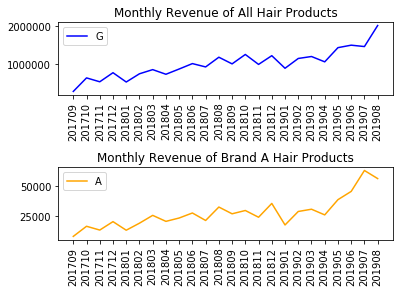

In [55]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(tx_revenue['InvoiceYearMonth'].astype(str),tx_revenue['Revenue'], color="blue")
ax2.plot(tx_revenue_A['InvoiceYearMonth'].astype(str),tx_revenue_A['Revenue'], color="orange")
ax1.legend("G")
ax2.legend("A")
ax1.set_title('Monthly Revenue of All Hair Products')
ax2.set_title('Monthly Revenue of Brand A Hair Products')
ax1.tick_params(axis ='x', rotation =90)
ax2.tick_params(axis ='x', rotation =90)
plt.subplots_adjust(hspace = 1)
#ax2.set_xlabel('Unit Price (TRY)')

### Monthly Revenue Growth Rate

Let's calculate the grow rate of the monthly revenue for hair products sold in Gratis.
Monthly growth % oscillates around a value slightly above 0 and seems stable. Notice that the amplitude of the oscillations are larger for Brand A when compared to rest, due to small sample size.

In [59]:
#using pct_change() function to see monthly percentage change
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()

#showing first 5 rows
tx_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201709,271441.300000,NaN
1,201710,629475.640000,1.319012
2,201711,526596.390000,-0.163436
3,201712,766644.920001,0.455849
4,201801,520568.950000,-0.320978


...and for Brand A.

In [60]:
#using pct_change() function to see monthly percentage change
tx_revenue_A['MonthlyGrowth'] = tx_revenue_A['Revenue'].pct_change()

#showing first 5 rows
tx_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201709,271441.300000,NaN
1,201710,629475.640000,1.319012
2,201711,526596.390000,-0.163436
3,201712,766644.920001,0.455849
4,201801,520568.950000,-0.320978


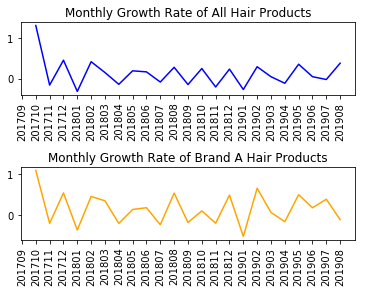

In [129]:
import numpy as np
fig, (ax1, ax2) = plt.subplots(2)

#plot of Gratis
ax1.plot(tx_revenue['InvoiceYearMonth'],tx_revenue['MonthlyGrowth'], color="blue")
'''# add trendline
z = np.polyfit(tx_revenue['InvoiceYearMonth'].astype(int), tx_revenue['MonthlyGrowth'], 1)
p = np.poly1d(z)
ax1.plot(tx_revenue['InvoiceYearMonth'],p(tx_revenue['InvoiceYearMonth'].astype(float)).astype(str),"b--")
fig.show()'''

#plot for Brand A
ax2.plot(tx_revenue_A['InvoiceYearMonth'],tx_revenue_A['MonthlyGrowth'], color="orange")


ax1.set_title('Monthly Growth Rate of All Hair Products')
ax2.set_title('Monthly Growth Rate of Brand A Hair Products')
ax1.tick_params(axis ='x', rotation =90)
ax2.tick_params(axis ='x', rotation =90)
plt.subplots_adjust(hspace = 1)
#ax2.set_xlabel('Unit Price (TRY)')

## References

1. [Know Your Metrics](https://towardsdatascience.com/data-driven-growth-with-python-part-1-know-your-metrics-812781e66a5b)
2. [Find Your Best Customers with Customer Segmentation in Python](https://towardsdatascience.com/find-your-best-customers-with-customer-segmentation-in-python-61d602f9eee6)